In [19]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from data import harris_ident_pos_df
from data import gaia_df
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [20]:
'''
harris_ident_pos_df["x"] = harris_ident_pos_df.ra.apply(lambda v: v[0])
harris_ident_pos_df["y"] = harris_ident_pos_df.ra.apply(lambda v: v[1])
harris_ident_pos_df["z"] = harris_ident_pos_df.dec.apply(lambda v: v[1])

center_x = harris_ident_pos_df.x.mean()
center_y = harris_ident_pos_df.y.mean()
center_z = harris_ident_pos_df.z.mean()

galactic_center = (center_x, center_y, center_z)

distance_to_center = np.sqrt(center_x**2 + center_y**2 + center_z**2)
'''

def estimate_distance(df): 
    cx = df["x"].mean()
    cy = df["y"].mean()
    cz = df["z"].mean()
    return np.sqrt(cx**2 + cy**2 + cz**2)



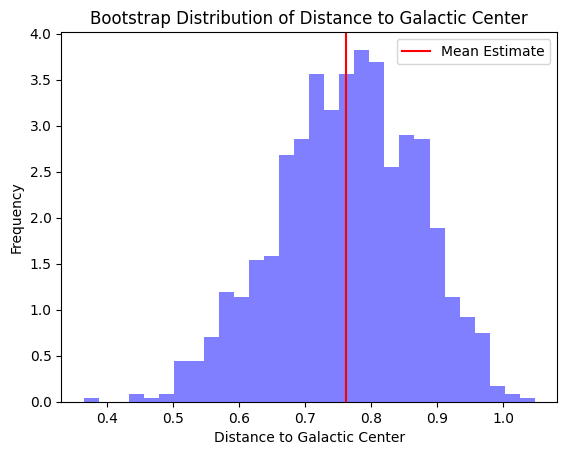

Mean Estimate: 0.762536787642444
Standard Deviation of Estimates: 0.10587076763467328


In [21]:
n_iterations = 1000
bootstrap_estimates = []

for _ in range(n_iterations): 
    sample = harris_ident_pos_df.sample(frac = 1, replace=True)
    estimate = estimate_distance(sample)
    bootstrap_estimates.append(estimate)

bootstrap_estimates = np.array(bootstrap_estimates)

plt.hist(bootstrap_estimates, bins=30, density=True, alpha=0.5, color='blue')
plt.axvline(np.mean(bootstrap_estimates), color = 'red', label = 'Mean Estimate')
plt.xlabel('Distance to Galactic Center')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of Distance to Galactic Center')
plt.legend()
plt.show()

mean_estimate = np.mean(bootstrap_estimates)
std_estimate = np.std(bootstrap_estimates)
print(f"Mean Estimate: {mean_estimate}")
print(f"Standard Deviation of Estimates: {std_estimate}")

In [22]:
accepted_value = 8.178
lower_bound = mean_estimate - std_estimate
upper_bound = mean_estimate + std_estimate

consistent = lower_bound <= accepted_value <= upper_bound

print(f"Accepted Value: {accepted_value}")
print(f"Your Estimate: {mean_estimate:.3f} +- {std_estimate:.3f}")
print(f"Range: [{lower_bound:.3f}, {upper_bound:.3f}]")
print(f"Is the accepted value consistent with your estimate? {'Yes' if consistent else 'No'}")

Accepted Value: 8.178
Your Estimate: 0.763 +- 0.106
Range: [0.657, 0.868]
Is the accepted value consistent with your estimate? No
